In [1]:
from pyspark.sql import SparkSession

spark = SparkSession \
    .builder \
    .appName('Knowledge Graph Visualization') \
    .master('spark://columbus-oh.cs.colostate.edu:30800') \
    .config("spark.yarn.resourcemanager.address", "columbia.cs.colostate.edu:30799") \
    .getOrCreate()

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/04/22 14:18:26 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [2]:
%pip install pygraphviz

Defaulting to user installation because normal site-packages is not writeable
--- Logging error ---
Traceback (most recent call last):
  File "/usr/local/python-env/py39/lib/python3.9/site-packages/pip/_internal/utils/logging.py", line 177, in emit
    self.console.print(renderable, overflow="ignore", crop=False, style=style)
  File "/usr/local/python-env/py39/lib/python3.9/site-packages/pip/_vendor/rich/console.py", line 1673, in print
    extend(render(renderable, render_options))
  File "/usr/local/python-env/py39/lib/python3.9/site-packages/pip/_vendor/rich/console.py", line 1305, in render
    for render_output in iter_render:
  File "/usr/local/python-env/py39/lib/python3.9/site-packages/pip/_internal/utils/logging.py", line 134, in __rich_console__
    for line in lines:
  File "/usr/local/python-env/py39/lib/python3.9/site-packages/pip/_vendor/rich/segment.py", line 249, in split_lines
    for segment in segments:
  File "/usr/local/python-env/py39/lib/python3.9/site-packages/p

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import pygraphviz
import pandas as pd

In [4]:
hdfs_path =  "hdfs://columbus-oh.cs.colostate.edu:30785/geospatial/graph/base_graph.csv"

# Read the CSV file
df = spark.read.csv(hdfs_path, header=True, inferSchema=True)

# Convert to Pandas DataFrame for easier manipulation when building the graph
df = df.toPandas()

# Continents Added

In [7]:
# NOT ON SPARK
df = pd.read_csv('./data/BaseEdges.csv')

In [8]:
df.count()

Subject         17
Relationship    17
Object          17
dtype: int64

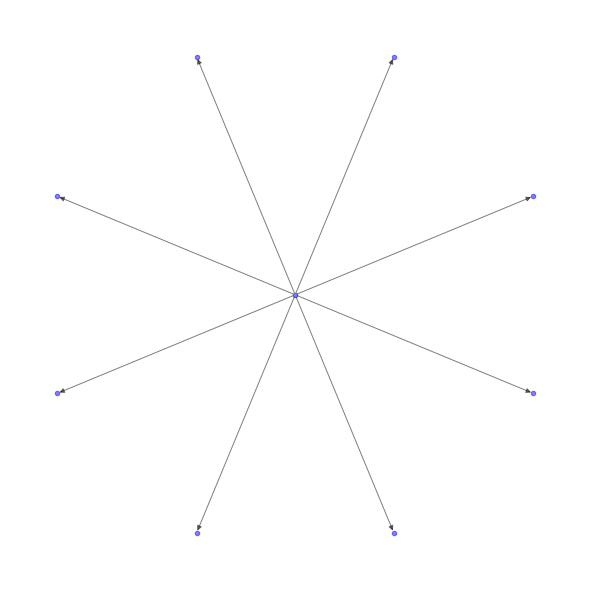

In [9]:
G = nx.DiGraph()

for idx, row in df.iterrows():
    if 'Contains' in row['Relationship']:
        G.add_edge(row['Subject'], row['Object'], relationship=row['Relationship'])

pos = nx.nx_agraph.graphviz_layout(G, prog="twopi", args="")

plt.figure(figsize=(8, 8))
nx.draw(G, pos, node_size=20, alpha=0.5, node_color="blue", with_labels=False)
plt.axis("equal")
plt.show()

# Countries Added

Subject         459
Relationship    459
Object          459
dtype: int64


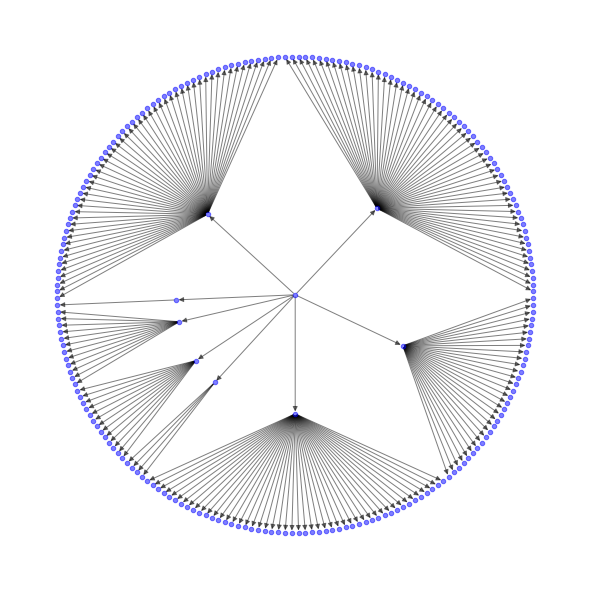

In [10]:
df = pd.read_csv('./data/BaseEdges.csv')

print(df.count())

G = nx.DiGraph()

for idx, row in df.iterrows():
    if 'Contains' in row['Relationship']:
        G.add_edge(row['Subject'], row['Object'], relationship=row['Relationship'])

pos = nx.nx_agraph.graphviz_layout(G, prog="twopi", args="")

plt.figure(figsize=(8, 8))
nx.draw(G, pos, node_size=20, alpha=0.5, node_color="blue", with_labels=False)
plt.axis("equal")
plt.show()

# States Added

Subject         565
Relationship    565
Object          565
dtype: int64


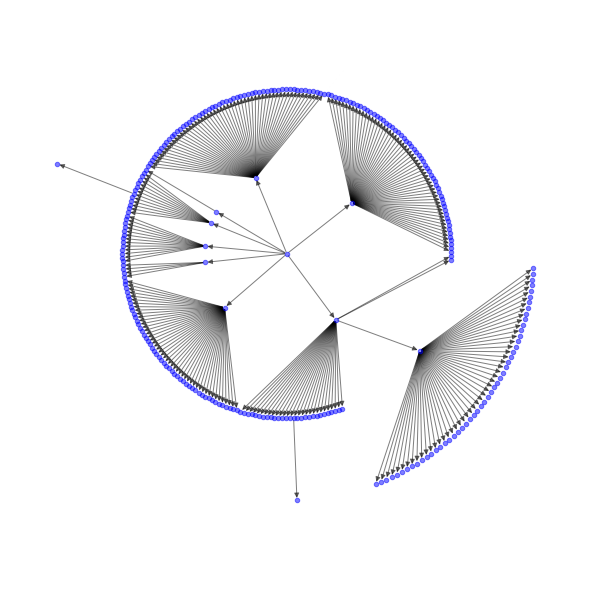

In [11]:
df = pd.read_csv('./data/BaseEdges.csv')

print(df.count())

G = nx.DiGraph()

for idx, row in df.iterrows():
    if 'Contains' in row['Relationship']:
        G.add_edge(row['Subject'], row['Object'], relationship=row['Relationship'])

pos = nx.nx_agraph.graphviz_layout(G, prog="twopi", args="")

plt.figure(figsize=(8, 8))
nx.draw(G, pos, node_size=20, alpha=0.5, node_color="blue", with_labels=False)
plt.axis("equal")
plt.show()

Two weird states? State_Guam,isPartOf,Country_Guam and State_Puerto Rico,isPartOf,Country_Puerto Rico

# Counties Added

Subject         7005
Relationship    7005
Object          7005
dtype: int64


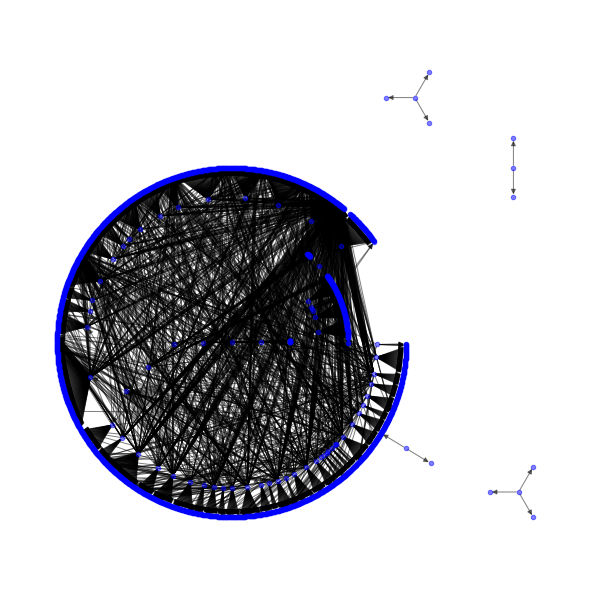

In [14]:
df = pd.read_csv('./data/BaseEdges.csv')

print(df.count())

G = nx.DiGraph()

for idx, row in df.iterrows():
    if 'Contains' in row['Relationship']:
        G.add_edge(row['Subject'], row['Object'], relationship=row['Relationship'])

pos = nx.nx_agraph.graphviz_layout(G, prog="twopi", args="")

plt.figure(figsize=(8, 8))
nx.draw(G, pos, node_size=20, alpha=0.5, node_color="blue", with_labels=False)
plt.axis("equal")
plt.show()

Seperate Graphs? Hawaii, Samoa, State Common Wealth

# Added Tracts

Subject         177447
Relationship    177447
Object          177447
dtype: int64


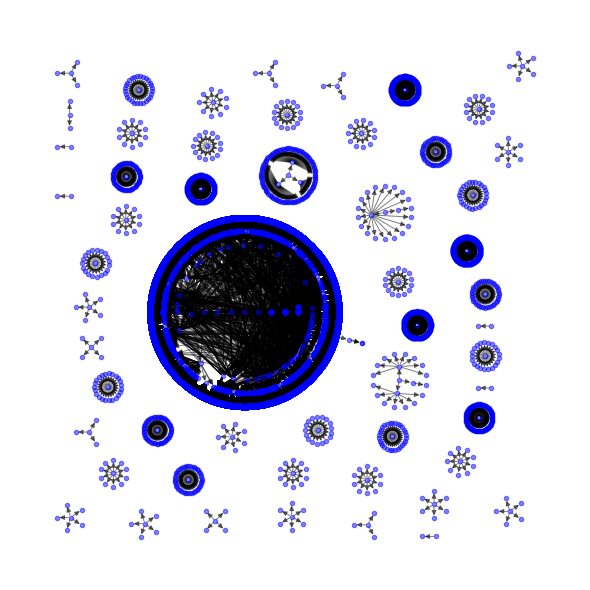

In [15]:
df = pd.read_csv('./data/BaseEdges.csv')

print(df.count())

G = nx.DiGraph()

for idx, row in df.iterrows():
    if 'Contains' in row['Relationship']:
        G.add_edge(row['Subject'], row['Object'], relationship=row['Relationship'])

pos = nx.nx_agraph.graphviz_layout(G, prog="twopi", args="")

plt.figure(figsize=(8, 8))
nx.draw(G, pos, node_size=20, alpha=0.5, node_color="blue", with_labels=False)
plt.axis("equal")
plt.show()

Ummmmmm what?

# Blocks Added

Subject         661391
Relationship    661391
Object          661391
dtype: int64


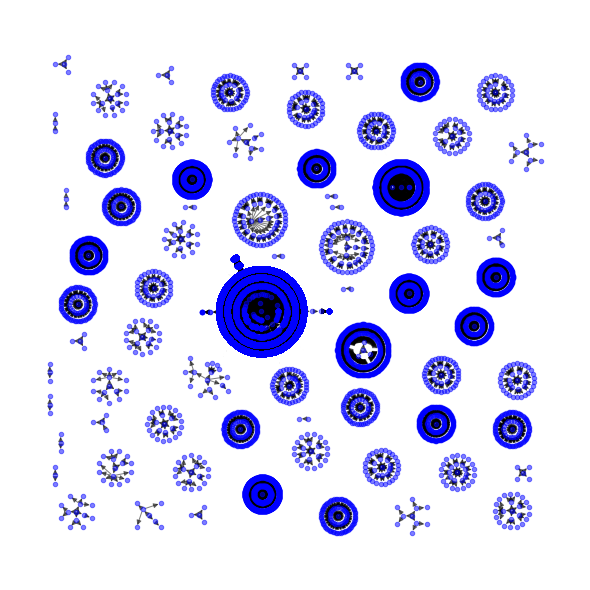

In [16]:
df = pd.read_csv('./data/BaseEdges.csv')

print(df.count())

G = nx.DiGraph()

for idx, row in df.iterrows():
    if 'Contains' in row['Relationship']:
        G.add_edge(row['Subject'], row['Object'], relationship=row['Relationship'])

pos = nx.nx_agraph.graphviz_layout(G, prog="twopi", args="")

plt.figure(figsize=(8, 8))
nx.draw(G, pos, node_size=20, alpha=0.5, node_color="blue", with_labels=False)
plt.axis("equal")
plt.show()